# How I Use This Code: Wrangling Fluorimeter Data

This notebook is a guide to the wrangling/fluorimeter subpackage found at https://github.com/ebentley17/Deniz_lab_code. If you are reading a PDF or HTML version of this notebook, you can find the Jupyter file at https://github.com/ebentley17/Deniz_lab_code/blob/master/wrangling/tutorials/Fluorimeter%20Guide.ipynb

In this notebook, I assume you have a rudimentary knowledge of python and of the pandas package, and focus primarily on demonstrating the use of the functions in wrangling/fluorimeter. I learned python primarily from from Justin Bois's online bootcamp lessons, which I highly recommend to beginners: http://justinbois.github.io/bootcamp/

<br>
<br>

## At the fluorimeter

When collecting data, you can name your experiment and write a comment. My convention is to detail the contents of my sample in the experiment title and the slits of the fluorimeter in the comment. 

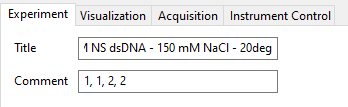

- In the experiment name, I include the concentrations of various molecules, separating the entries with " - ". For example, "75 nM DNA - 150 mM NaCl". Other details can also be noted here.
- I specify slits in the order they fall along the beampath - from closest to the lamp to closest to the detector. Thus, I might enter "2, 2, 1, 1" or "1 all" as my comment.

Each experiment will create a .ifx file containing the results, as well as an unreadable .CHD file. The .ifx files are essentially text files; you can open them with notepad or another simple text editor.

### Notes

This practice data was collected in 2018, before some minor updates to the fluorimeter software. For example, the anisotropy data does not have GFactor information. The code will still work with data collected after this update. (Note updated 5/2021)

<br>
<br>

## Starting up the code

Install the wrangling package using <br>
`pip install git+https://github.com/ebentley17/Deniz_lab_code/`

In [1]:
import glob
import pandas as pd

from wrangling import utilities, fluorimeter

<br>
<br>

## Importing the data

Let's take a look at all the files in the sample_data folder provided with this notebook.

In [2]:
glob.glob("sample_data/fluorimeter/*")

['sample_data/fluorimeter\\75 nM NS dsDNA Cy5 - 150 mM NaCl - 20deg - anisotropy 2.ifx',
 'sample_data/fluorimeter\\75 nM NS dsDNA Cy5 - 150 mM NaCl - 20deg - anisotropy.ifx',
 'sample_data/fluorimeter\\75 nM NS dsDNA Cy5 - 150 mM NaCl - 20deg return - anisotropy.ifx',
 'sample_data/fluorimeter\\75 nM NS dsDNA Cy5 - 150 mM NaCl - 70deg - anisotropy.ifx',
 'sample_data/fluorimeter\\75 nM NS ssDNA Cy5 - 150 mM NaCl - 20deg - anisotropy.ifx',
 'sample_data/fluorimeter\\75 nM NS ssDNA Cy5 - 150 mM NaCl - 20deg return - anisotropy.ifx',
 'sample_data/fluorimeter\\75 nM NS ssDNA Cy5 - 150 mM NaCl - 70deg - anisotropy.ifx',
 'sample_data/fluorimeter\\75 nM SST dsDNA Cy5 - 150 mM NaCl - 20deg - anisotropy.ifx',
 'sample_data/fluorimeter\\75 nM SST dsDNA Cy5 - 150 mM NaCl - 20deg return - anisotropy.ifx',
 'sample_data/fluorimeter\\75 nM SST dsDNA Cy5 - 150 mM NaCl - 70deg - anisotropy 2.ifx',
 'sample_data/fluorimeter\\75 nM SST dsDNA Cy5 - 150 mM NaCl - 70deg - anisotropy 3.ifx',
 'sample_dat

<br>
<br>

Opening our first file in Notepad looks like this:

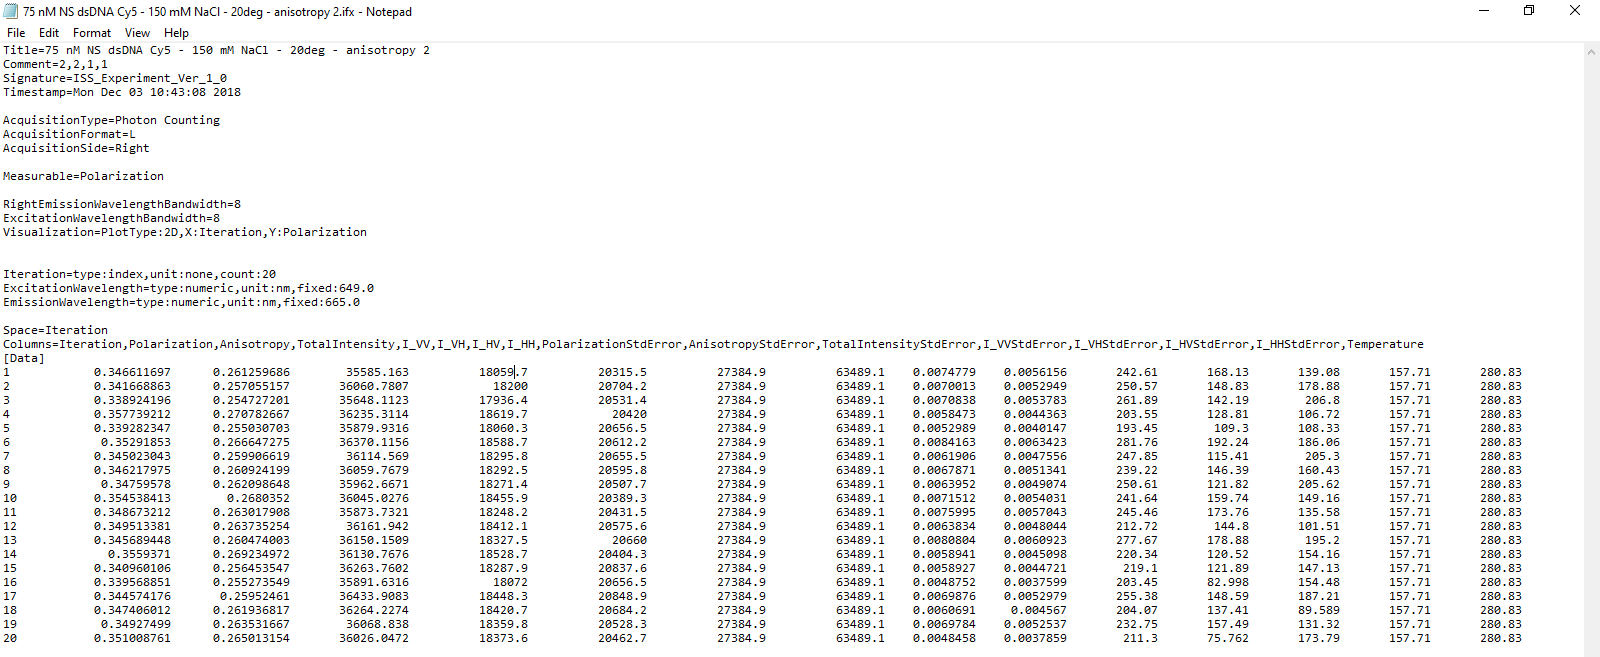

<br>
<br>

### Making dataframes


`ifx_to_dataframe()` will take one .ifx file and convert the introductory lines into a descriptor string, and the table into a dataframe.

In [3]:
dataframe, descriptor = fluorimeter.ifx_to_dataframe(
    'sample_data/fluorimeter/75 nM NS dsDNA Cy5 - 150 mM NaCl - 20deg - anisotropy 2.ifx'
)
print("This is the descriptor:\n\n",descriptor,"\n\nThis is the dataframe:")
dataframe

This is the descriptor:

 Title=75 nM NS dsDNA Cy5 - 150 mM NaCl - 20deg - anisotropy 2
Comment=2,2,1,1
Signature=ISS_Experiment_Ver_1_0
Timestamp=Mon Dec 03 10:43:08 2018

AcquisitionType=Photon Counting
AcquisitionFormat=L
AcquisitionSide=Right

Measurable=Polarization

RightEmissionWavelengthBandwidth=8
ExcitationWavelengthBandwidth=8
Visualization=PlotType:2D,X:Iteration,Y:Polarization


Iteration=type:index,unit:none,count:20
ExcitationWavelength=type:numeric,unit:nm,fixed:649.0
EmissionWavelength=type:numeric,unit:nm,fixed:665.0

Space=Iteration
 

This is the dataframe:


,Iteration,Polarization,Anisotropy,TotalIntensity,I_VV,I_VH,I_HV,I_HH,PolarizationStdError,AnisotropyStdError,TotalIntensityStdError,I_VVStdError,I_VHStdError,I_HVStdError,I_HHStdError,Temperature
0,1,0.346611697,0.261259686,35585.163,18059.7,20315.5,27384.9,63489.1,0.0074779,0.0056156,242.61,168.13,139.08,157.71,280.83,20.01
1,2,0.341668863,0.257055157,36060.7807,18200,20704.2,27384.9,63489.1,0.0070013,0.0052949,250.57,148.83,178.88,157.71,280.83,20.01
2,3,0.338924196,0.254727201,35648.1123,17936.4,20531.4,27384.9,63489.1,0.0070838,0.0053783,261.89,142.19,206.8,157.71,280.83,20.01
3,4,0.357739212,0.270782667,36235.3114,18619.7,20420,27384.9,63489.1,0.0058473,0.0044363,203.55,128.81,106.72,157.71,280.83,20.0066
4,5,0.339282347,0.255030703,35879.9316,18060.3,20656.5,27384.9,63489.1,0.0052989,0.0040147,193.45,109.3,108.33,157.71,280.83,20.0066
5,6,0.35291853,0.266647275,36370.1156,18588.7,20612.2,27384.9,63489.1,0.0084163,0.0063423,281.76,192.24,186.06,157.71,280.83,20.0066
6,7,0.345023043,0.259906619,36114.569,18295.8,20655.5,27384.9,63489.1,0.0061906,0.0047556,247.85,115.41,205.3,157.71,280.83,20.0066
7,8,0.346217975,0.260924199,36059.7679,18292.5,20595.8,27384.9,63489.1,0.0067871,0.0051341,239.22,146.39,160.43,157.71,280.83,20.0066
8,9,0.34759578,0.262098648,35962.6671,18271.4,20507.7,27384.9,63489.1,0.0063952,0.0049074,250.61,121.82,205.62,157.71,280.83,20.0066
9,10,0.354538413,0.2680352,36045.0276,18455.9,20389.3,27384.9,63489.1,0.0071512,0.0054031,241.64,159.74,149.16,157.71,280.83,20.0066


<br>

For visual simplicity in this demonstration, I will remove several columns of the dataframe we don't currently need. I will also often only show a preview of the dataframe to save space.

In [4]:
to_drop = [x for x in dataframe.columns if "StdError" in x or "I" in x]
dataframe.drop(columns=to_drop).head()

,Polarization,Anisotropy,Temperature
0,0.346611697,0.261259686,20.01
1,0.341668863,0.257055157,20.01
2,0.338924196,0.254727201,20.01
3,0.357739212,0.270782667,20.0066
4,0.339282347,0.255030703,20.0066


<br>
<br>

### Adding textual data

`add_descriptor_data()` will extract several pieces of information from the descriptor and add them to the dataframe.

- looks for "mM", "uM", "nM", or "pM" in the title to extract conditions and add them as columns
    - conditions must be in the format "[concentration] [unit] [molecule name]" and separated by " - "
        - For example: "75 nM DNA - 150 mM NaCl"
    - spaces matter
    - units are case sensitive
    - "M" is not recognized to prevent faulty identification of every capital M - describe concentrations in the molar range using millimolar instead
    - any other contents of the title will be ignored, so feel free to include other helpful details there
- adds comment and timestamp columns
- adds the excitation and emission wavelengths **if they are fixed values**. These columns will be called "ex wavelength (nm)" and "em wavelength (nm)", respectively
    - Varying wavelengths are included in the initial dataframe.
- optionally, you can use the kwarg `title_as_column=True` to have the entire experiment title added as its own column

#### Potential points of confusion: 
- "nM" (nano**molar**) and "nm" (nano**meter**) are different; only nM will be treated as a unit of concentration
- brackets are used in strings to indicate concentrations of molecules (for example, "[NaCl]"); do not confuse these with brackets in the code used for slicing the dataframe

`add_descriptor_data()` works on the output of `ifx_to_dataframe()`, so the calls can be nested.

In [5]:
df = fluorimeter.add_descriptor_data(
    fluorimeter.ifx_to_dataframe('sample_data/fluorimeter/75 nM NS dsDNA Cy5 - 150 mM NaCl - 20deg - anisotropy 2.ifx')
)
df.drop(columns=to_drop).head()

,Polarization,Anisotropy,Temperature,[NS dsDNA Cy5],[NaCl],comment,timestamp,ex wavelength (nm),em wavelength (nm)
0,0.346611697,0.261259686,20.01,75 nM,150 mM,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0
1,0.341668863,0.257055157,20.01,75 nM,150 mM,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0
2,0.338924196,0.254727201,20.01,75 nM,150 mM,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0
3,0.357739212,0.270782667,20.0066,75 nM,150 mM,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0
4,0.339282347,0.255030703,20.0066,75 nM,150 mM,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0


<br>
<br>

### Pull it all together

`assemble_ifx_files()` performs both of these functions on an entire list of files and combines them into one dataframe. If desired, you can use the kwarg `title_as_column=True`.

In [6]:
file_list = glob.glob("sample_data/fluorimeter/*anisotropy*.ifx")
file_list

['sample_data/fluorimeter\\75 nM NS dsDNA Cy5 - 150 mM NaCl - 20deg - anisotropy 2.ifx',
 'sample_data/fluorimeter\\75 nM NS dsDNA Cy5 - 150 mM NaCl - 20deg - anisotropy.ifx',
 'sample_data/fluorimeter\\75 nM NS dsDNA Cy5 - 150 mM NaCl - 20deg return - anisotropy.ifx',
 'sample_data/fluorimeter\\75 nM NS dsDNA Cy5 - 150 mM NaCl - 70deg - anisotropy.ifx',
 'sample_data/fluorimeter\\75 nM NS ssDNA Cy5 - 150 mM NaCl - 20deg - anisotropy.ifx',
 'sample_data/fluorimeter\\75 nM NS ssDNA Cy5 - 150 mM NaCl - 20deg return - anisotropy.ifx',
 'sample_data/fluorimeter\\75 nM NS ssDNA Cy5 - 150 mM NaCl - 70deg - anisotropy.ifx',
 'sample_data/fluorimeter\\75 nM SST dsDNA Cy5 - 150 mM NaCl - 20deg - anisotropy.ifx',
 'sample_data/fluorimeter\\75 nM SST dsDNA Cy5 - 150 mM NaCl - 20deg return - anisotropy.ifx',
 'sample_data/fluorimeter\\75 nM SST dsDNA Cy5 - 150 mM NaCl - 70deg - anisotropy 2.ifx',
 'sample_data/fluorimeter\\75 nM SST dsDNA Cy5 - 150 mM NaCl - 70deg - anisotropy 3.ifx',
 'sample_dat

In [7]:
df = fluorimeter.assemble_ifx_files(file_list)
df = df.drop(columns=to_drop)
df

,Polarization,Anisotropy,Temperature,[NS dsDNA Cy5],[NaCl],comment,timestamp,ex wavelength (nm),em wavelength (nm),[NS ssDNA Cy5],[SST dsDNA Cy5],[SST ssDNA Cy5]
0,0.346611697,0.261259686,20.01,75 nM,150 mM,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0,NaN,NaN,NaN
1,0.341668863,0.257055157,20.01,75 nM,150 mM,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0,NaN,NaN,NaN
2,0.338924196,0.254727201,20.01,75 nM,150 mM,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0,NaN,NaN,NaN
3,0.357739212,0.270782667,20.0066,75 nM,150 mM,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0,NaN,NaN,NaN
4,0.339282347,0.255030703,20.0066,75 nM,150 mM,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.2740285,0.201050158,70.01,NaN,150 mM,"2,2,1,1",Fri Nov 30 15:21:39 2018,649.0,660.0,NaN,NaN,75 nM
296,0.286082558,0.210826279,70.01,NaN,150 mM,"2,2,1,1",Fri Nov 30 15:21:39 2018,649.0,660.0,NaN,NaN,75 nM
297,0.293534023,0.216913144,70.0133,NaN,150 mM,"2,2,1,1",Fri Nov 30 15:21:39 2018,649.0,660.0,NaN,NaN,75 nM
298,0.254546138,0.185431008,70.0133,NaN,150 mM,"2,2,1,1",Fri Nov 30 15:21:39 2018,649.0,660.0,NaN,NaN,75 nM


<br>

This simple function can save hours of copying and pasting into excel. If this is all you want, you can save your combined dataframe with `df.to_csv()`.

<br>
<br>

## Processing the data

### Combining related columns

For the sample data, I used four different kinds of DNA: NS ssDNA, NS dsDNA, SST ssDNA, and SST dsDNA. Each of these has its own column, but because I only used one DNA at a time, most of the contents of those columns are NaN. We can break them out into only two columns: one to specify which DNA was used, and one to specify the concentration. 

Note that this function does not work on groups of columns that have multiple valid (non-NaN) values between them per row.

In [8]:
df.columns

Index(['Polarization', 'Anisotropy', 'Temperature', '[NS dsDNA Cy5]', '[NaCl]',
       'comment', 'timestamp', 'ex wavelength (nm)', 'em wavelength (nm)',
       '[NS ssDNA Cy5]', '[SST dsDNA Cy5]', '[SST ssDNA Cy5]'],
      dtype='object')

In [9]:
df = fluorimeter.break_out_variable(
    df,
    columns=["[NS dsDNA Cy5]", "[NS ssDNA Cy5]", "[SST dsDNA Cy5]", "[SST ssDNA Cy5]"],
    variable="DNA"
)

df

,Polarization,Anisotropy,Temperature,[NaCl],comment,timestamp,ex wavelength (nm),em wavelength (nm),DNA,[DNA]
0,0.346611697,0.261259686,20.01,150 mM,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0,NS dsDNA Cy5,75 nM
1,0.341668863,0.257055157,20.01,150 mM,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0,NS dsDNA Cy5,75 nM
2,0.338924196,0.254727201,20.01,150 mM,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0,NS dsDNA Cy5,75 nM
3,0.357739212,0.270782667,20.0066,150 mM,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0,NS dsDNA Cy5,75 nM
4,0.339282347,0.255030703,20.0066,150 mM,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0,NS dsDNA Cy5,75 nM
...,...,...,...,...,...,...,...,...,...,...
295,0.2740285,0.201050158,70.01,150 mM,"2,2,1,1",Fri Nov 30 15:21:39 2018,649.0,660.0,SST ssDNA Cy5,75 nM
296,0.286082558,0.210826279,70.01,150 mM,"2,2,1,1",Fri Nov 30 15:21:39 2018,649.0,660.0,SST ssDNA Cy5,75 nM
297,0.293534023,0.216913144,70.0133,150 mM,"2,2,1,1",Fri Nov 30 15:21:39 2018,649.0,660.0,SST ssDNA Cy5,75 nM
298,0.254546138,0.185431008,70.0133,150 mM,"2,2,1,1",Fri Nov 30 15:21:39 2018,649.0,660.0,SST ssDNA Cy5,75 nM


<br>
<br>

### Converting concentrations

For easier analysis, we can convert our concentration columns to numeric values. `standardize_concentration()` will also convert different units to match within a column. Again, only mM, uM, nM, and pM are recognized - no M.

In [10]:
df = utilities.standardize_concentration(df, columns=["[DNA]"], unit="nM")
df = utilities.standardize_concentration(df, columns=["[NaCl]"], unit="mM")
df

,Polarization,Anisotropy,Temperature,[NaCl] (mM),comment,timestamp,ex wavelength (nm),em wavelength (nm),DNA,[DNA] (nM)
0,0.346611697,0.261259686,20.01,150,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0,NS dsDNA Cy5,75
1,0.341668863,0.257055157,20.01,150,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0,NS dsDNA Cy5,75
2,0.338924196,0.254727201,20.01,150,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0,NS dsDNA Cy5,75
3,0.357739212,0.270782667,20.0066,150,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0,NS dsDNA Cy5,75
4,0.339282347,0.255030703,20.0066,150,"2,2,1,1",Mon Dec 03 10:43:08 2018,649.0,665.0,NS dsDNA Cy5,75
...,...,...,...,...,...,...,...,...,...,...
295,0.2740285,0.201050158,70.01,150,"2,2,1,1",Fri Nov 30 15:21:39 2018,649.0,660.0,SST ssDNA Cy5,75
296,0.286082558,0.210826279,70.01,150,"2,2,1,1",Fri Nov 30 15:21:39 2018,649.0,660.0,SST ssDNA Cy5,75
297,0.293534023,0.216913144,70.0133,150,"2,2,1,1",Fri Nov 30 15:21:39 2018,649.0,660.0,SST ssDNA Cy5,75
298,0.254546138,0.185431008,70.0133,150,"2,2,1,1",Fri Nov 30 15:21:39 2018,649.0,660.0,SST ssDNA Cy5,75


<br>
<br>

### Applying corrections

The fluorimeter's sensitivity varies over its wavelength range, so corrections must be applied to intensity spectra. To demonstrate, I will import some intensity files.

In [11]:
intensity_df = fluorimeter.assemble_ifx_files(glob.glob("sample_data/fluorimeter/*intensity*.ifx"))
intensity_df.head()

,EmissionWavelength,Intensity,IntensityStdError,Temperature,[NS dsDNA Cy5],[NaCl],comment,timestamp,ex wavelength (nm),[SST dsDNA Cy5]
0,655,105667.1,393.05,19.9966,75 nM,150 mM,"1,1,1,1",Mon Dec 03 10:37:55 2018,649.0,NaN
1,656,110108,317.54,19.9966,75 nM,150 mM,"1,1,1,1",Mon Dec 03 10:37:55 2018,649.0,NaN
2,657,114104,370.21,19.9966,75 nM,150 mM,"1,1,1,1",Mon Dec 03 10:37:55 2018,649.0,NaN
3,658,117259.1,244.43,19.9966,75 nM,150 mM,"1,1,1,1",Mon Dec 03 10:37:55 2018,649.0,NaN
4,659,120683.4,343.01,19.9966,75 nM,150 mM,"1,1,1,1",Mon Dec 03 10:37:55 2018,649.0,NaN


<br>

Fluorimeter correction files can be found in `fluorimeter/corrections/`.

In [12]:
glob.glob("../fluorimeter/corrections/*.ifa")

['../fluorimeter/corrections\\horizontal polarizer and slit 05.ifa',
 '../fluorimeter/corrections\\horizontal polarizer and slit 1.ifa',
 '../fluorimeter/corrections\\horizontal polarizer and slit 2.ifa',
 '../fluorimeter/corrections\\vertical polarizer and slit 05.ifa',
 '../fluorimeter/corrections\\vertical polarizer and slit 1.ifa',
 '../fluorimeter/corrections\\vertical polarizer and slit 2.ifa',
 '../fluorimeter/corrections\\without polarizer and slit 05.ifa',
 '../fluorimeter/corrections\\without polarizer and slit 1.ifa',
 '../fluorimeter/corrections\\without polarizer and slit 2.ifa']

<br>

The values contained in the files indicate the instrument's sensitivity at the designated wavelength. To correct data, the intensity should be **divided by** the corresponding correction factor. 

`correct_df_intensity()` will do this automatically. The corrected intensities shown below are larger than the raw intensities shown above. 

In [13]:
fluorimeter.correct_df_intensity(
    intensity_df,
    detect_slit=True
).head()

,EmissionWavelength,Intensity,IntensityStdError,Temperature,[NS dsDNA Cy5],[NaCl],comment,timestamp,ex wavelength (nm),[SST dsDNA Cy5]
0,655,258484.325885,393.05,19.9966,75 nM,150 mM,"1,1,1,1",Mon Dec 03 10:37:55 2018,649.0,NaN
1,656,271372.413708,317.54,19.9966,75 nM,150 mM,"1,1,1,1",Mon Dec 03 10:37:55 2018,649.0,NaN
2,657,283321.725247,370.21,19.9966,75 nM,150 mM,"1,1,1,1",Mon Dec 03 10:37:55 2018,649.0,NaN
3,658,293347.226114,244.43,19.9966,75 nM,150 mM,"1,1,1,1",Mon Dec 03 10:37:55 2018,649.0,NaN
4,659,304189.545984,343.01,19.9966,75 nM,150 mM,"1,1,1,1",Mon Dec 03 10:37:55 2018,649.0,NaN


<br>

If you use `detect_slit=True`, as above, the program will interpret which slits were used from the "comment" field.

Alternatively, you can specify which slit to use in your correction lookup. Using kwarg `slit=2` results in different corrections than if we allow the program to detect that slit 1 is listed in the comment column.

In [14]:
fluorimeter.correct_df_intensity(
    intensity_df,
    slit=2
).head()

,EmissionWavelength,Intensity,IntensityStdError,Temperature,[NS dsDNA Cy5],[NaCl],comment,timestamp,ex wavelength (nm),[SST dsDNA Cy5]
0,655,221181.880883,393.05,19.9966,75 nM,150 mM,"1,1,1,1",Mon Dec 03 10:37:55 2018,649.0,NaN
1,656,232129.831470,317.54,19.9966,75 nM,150 mM,"1,1,1,1",Mon Dec 03 10:37:55 2018,649.0,NaN
2,657,242270.596791,370.21,19.9966,75 nM,150 mM,"1,1,1,1",Mon Dec 03 10:37:55 2018,649.0,NaN
3,658,250758.847518,244.43,19.9966,75 nM,150 mM,"1,1,1,1",Mon Dec 03 10:37:55 2018,649.0,NaN
4,659,259921.000715,343.01,19.9966,75 nM,150 mM,"1,1,1,1",Mon Dec 03 10:37:55 2018,649.0,NaN


<br>

#### Notes:

- ISS has only provided corrections for all matching slits. Thus, `correct_df_intensity` with `detect_slit=True` expects all four slits to be the same for a given measurement. However, the dataframe can contain different measurements with varying slits, which will be detected appropriately.
    - `correct_df_intensity` with `detect=True` will fail on the comment "1,1,2,2".
    - Separate rows with the comments "1,1,1,1" and "2,2,2,2" can exist in the same dataframe, and `detect=True` will allow them to be corrected separately.
- `correct_df_intensity()` assumes data was collected **without** polarizers in place. 
- You can use `get_corrections()` to work directly with corrections values, including those from the polarizer files.

In [15]:
corrections_dict = fluorimeter.get_corrections(polarizer="vertical", slit=0.5)

for i in range(250, 260):
    print(i, ":", corrections_dict[i])

250 : 0.975229
251 : 0.9697279999999999
252 : 0.964227
253 : 0.9448194999999999
254 : 0.925412
255 : 0.901341
256 : 0.87727
257 : 0.8499205000000001
258 : 0.822571
259 : 0.805483


<br>
<br>

## Analyzing the data

I like to plot and fit my data in GraphPad Prism. I wrote an easy function for copying and pasting summarized data into Prism's "Mean, SD, N" format.

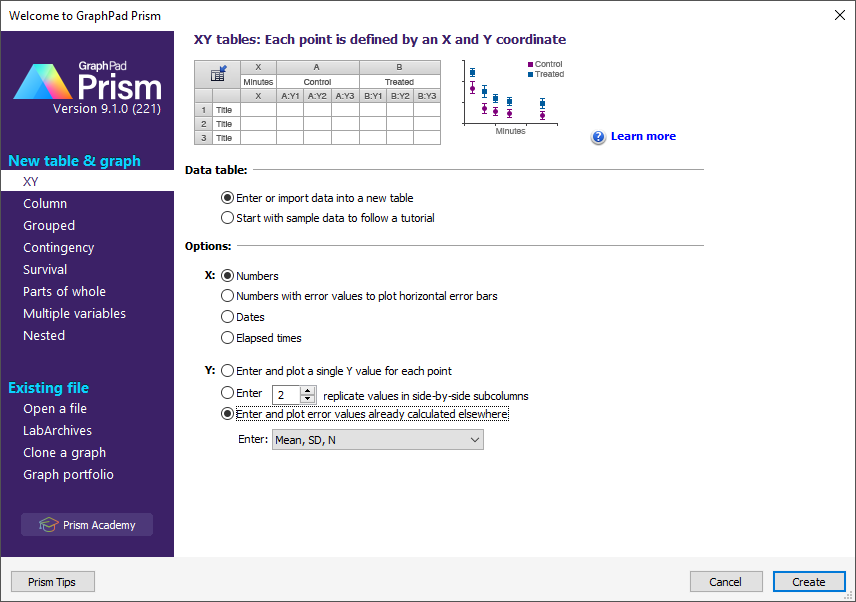

In [16]:
fluorimeter.make_prism_data(
    df,
    variable_to_calculate="Anisotropy",
    column_variable="DNA",
    row_variable="[DNA] (nM)",
)

DNA        NS dsDNA Cy5                 NS ssDNA Cy5                  \
value              mean       std count         mean       std count   
[DNA] (nM)                                                             
75.0           0.238744  0.043927  80.0     0.223614  0.035002  60.0   

DNA        SST dsDNA Cy5                  SST ssDNA Cy5                  
value               mean       std  count          mean       std count  
[DNA] (nM)                                                               
75.0            0.216561  0.048776  100.0      0.223648  0.023695  60.0

<br>
<br>

This is ready to copy and paste into Prism:

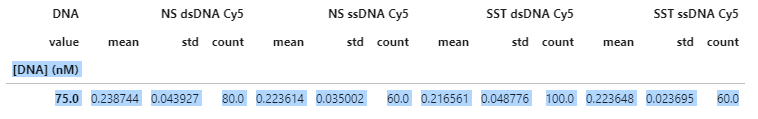
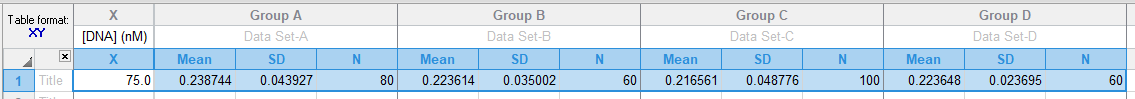

<br>
<br>

The above example is rather simple, since we only did the experiment at one concentration. However, this function is especially useful for data with measurements at multiple concentrations and with multiple conditions, such as titration data. 

To demonstrate, we could instead let our x variable be temperature. I'll round the temperatures to the nearest ten first.

In [17]:
# rounding the temperatures
for i, row in df.iterrows():
    df.loc[i, "Temperature"] = round(float(row["Temperature"]), -1)

fluorimeter.make_prism_data(
    df,
    variable_to_calculate="Anisotropy",
    column_variable="DNA",
    row_variable="Temperature",
)

DNA         NS dsDNA Cy5                 NS ssDNA Cy5                  \
value               mean       std count         mean       std count   
Temperature                                                             
20.0            0.263618  0.006782  60.0     0.247781  0.005592  40.0   
70.0            0.164121  0.008048  20.0     0.175280  0.007175  20.0   

DNA         SST dsDNA Cy5                 SST ssDNA Cy5                  
value                mean       std count          mean       std count  
Temperature                                                              
20.0             0.274302  0.006751  40.0      0.238698  0.007593  40.0  
70.0             0.178068  0.013954  60.0      0.193548  0.013950  20.0

<br>

This table can be copy and pasted directly into Prism for plotting and fitting.

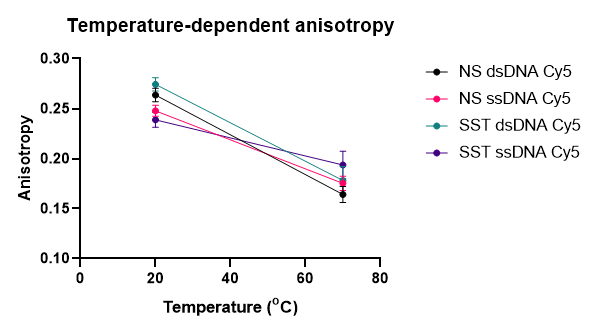